In [101]:
from minisom import MiniSom
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt', 
                    names=['area', 'perimeter', 'compactness', 'length_kernel', 'width_kernel',
                   'asymmetry_coefficient', 'length_kernel_groove', 'target'], usecols=[0, 5], 
                   sep='\t+', engine='python')
# data normalization
print(df.shape)
df.head()

(210, 2)


,area,asymmetry_coefficient
0,15.26,2.221
1,14.88,1.018
2,14.29,2.699
3,13.84,2.259
4,16.14,1.355


In [100]:
# data normalization
data = (df - np.mean(df, axis=0)) / np.std(df, axis=0)
print(data.shape)
data = data.values
data

(210, 2)


array([[ 1.42097769e-01, -9.86151745e-01],
       [ 1.11880257e-02, -1.78816620e+00],
       [-1.92066576e-01, -6.67479334e-01],
       [-3.47091272e-01, -9.60817955e-01],
       [ 4.45257175e-01, -1.56349549e+00],
       [-1.61061637e-01, -8.25482182e-01],
       [-5.42668460e-02, -7.61353407e-02],
       [-2.54076455e-01, -6.66812655e-01],
       [ 6.14061844e-01, -1.10682059e+00],
       [ 5.48606973e-01, -1.15415477e+00],
       [ 1.42097769e-01,  5.61876160e-01],
       [-2.81636401e-01, -1.32215780e+00],
       [-3.29866306e-01,  1.90536133e-01],
       [-3.67761232e-01, -3.76140749e-01],
       [-3.81541205e-01, -5.12143200e-01],
       [-8.87167785e-02,  3.23205191e-01],
       [-2.95416374e-01,  1.02255113e+00],
       [ 2.90232479e-01, -1.40082589e+00],
       [-5.08218528e-02, -1.28882387e+00],
       [-7.32930516e-01,  2.67870860e-01],
       [-2.36851488e-01, -4.18808184e-01],
       [-2.54076455e-01, -6.74812799e-01],
       [ 3.55687351e-01, -1.95676924e+00],
       [-9.

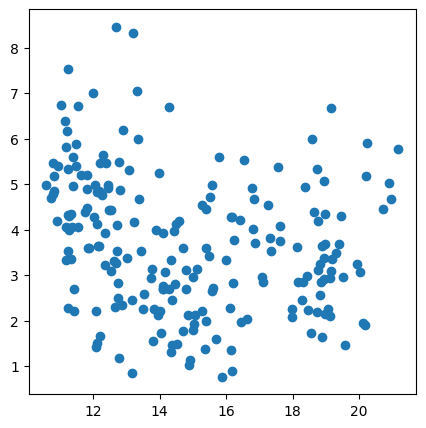

In [95]:
plt.figure(figsize=(5, 5))
plt.scatter(data[:, 0], data[:, 1])

In [96]:
"""
def __init__(self, x, y, input_len, sigma=1.0, learning_rate=0.5,
                 decay_function=asymptotic_decay,
                 neighborhood_function='gaussian', topology='rectangular',
                 activation_distance='euclidean', random_seed=None):

Parameters
        ----------
        x : int
            x dimension of the SOM.

        y : int
            y dimension of the SOM.

        input_len : int
            Number of the elements of the vectors in input.

"""


# Initialization and training
som_shape = (1, 3)
som = MiniSom(som_shape[0], som_shape[1], data.shape[1], sigma=.5, learning_rate=.5,
              neighborhood_function='gaussian', random_seed=10)

som.train_batch(data, 500, verbose=True)

 [ 500 / 500 ] 100% - 0:00:00 left 
 quantization error: 1.609655863342415


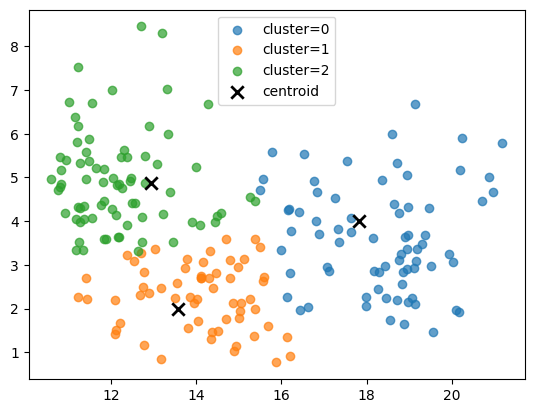

In [97]:
# each neuron represents a cluster
winner_coordinates = np.array([som.winner(x) for x in data]).T
# with np.ravel_multi_index we convert the bidimensional
# coordinates to a monodimensional index
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)


# plotting the clusters using the first 2 dimentions of the data
for c in np.unique(cluster_index):
    plt.scatter(data[cluster_index == c, 0],
                data[cluster_index == c, 1], label='cluster='+str(c), alpha=.7)

# plotting centroids
for centroid in som.get_weights():
    plt.scatter(centroid[:, 0], centroid[:, 1], marker='x', 
                s=80, linewidths=2, color='k', label='centroid')
plt.legend()